In [1]:
import experiment
import sys
sys.path.append("../../modules/")
from helper import *
# ---
import lasagne
from lasagne.layers import *
import theano
from theano import tensor as T
# ---
from matplotlib import pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/Theano-0.8.0.dev0-py2.7.egg/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")
cudnn not detected


In [12]:
model_name = "exp1.model"
args = dict()
# because we used cudnn on cuda, we have to use conv2d/maxpool2d here, 
# which means changing those classes' flip_filter behaviours
#args["dont_flip_filters"] = False
args["input_shape"] = (None, 1, 60, 60)
args["max_epochs"] = 100
args["alpha"] = 0.01
args["seed"] = 0
args["batch_size"] = 128
args["out_model"] = model_name
args["out_stats"] = "exp1"
net = experiment.get_net(args)
net.load_params_from(model_name)
#net.initialize()
print net

Loaded parameters to layer 'dense6' (shape 320x20).
Loaded parameters to layer 'dense6' (shape 20).
Loaded parameters to layer 'dense7' (shape 20x6).
Loaded parameters to layer 'dense7' (shape 6).
Loaded parameters to layer 'dense16' (shape 64x10).
Loaded parameters to layer 'dense16' (shape 10).
NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x107c315d0>,
     batch_iterator_train=<helper.ShufflingBatchIterator object at 0x145915710>,
     custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x10f520390>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x107c32cf8>,
     objective_loss_function=<function categorical_crossentropy at 0x1078c5e60>,
     on_batch_finished=[],
     on_epoch_finished=[<function after_epoch at 0x142a3fb18>, <function after_epoch at 0x1475c6500>, <nolearn.lasagne.handlers.PrintLog instance at 0x157678200>],
     on_training_finished=[],
     on_

In [13]:
layers = net.get_all_layers()
l_trans = None
for layer in layers:
    if isinstance(layer, TransformerLayer):
        l_trans = layer

X = T.tensor4('x')
get_trans_out = theano.function([X], lasagne.layers.get_output(l_trans, X))

In [14]:
layers[2].flip_filters

True

In [15]:
#train_set, _, _ = load_mnist("../../data/mnist.pkl.gz")
#Xt, _ = train_set
train_set = load_cluttered_mnist_train_only("../../data/mnist_cluttered_60x60_6distortions.npz")
Xt, _ = train_set

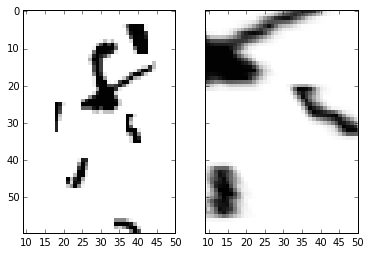

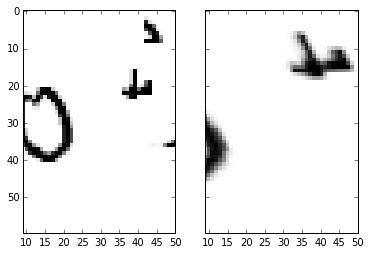

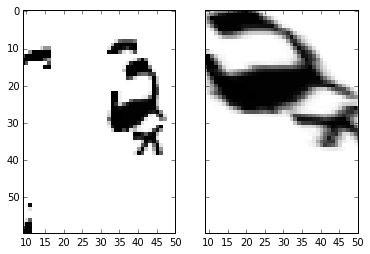

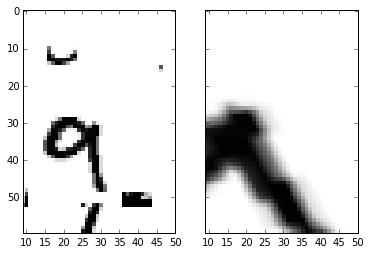

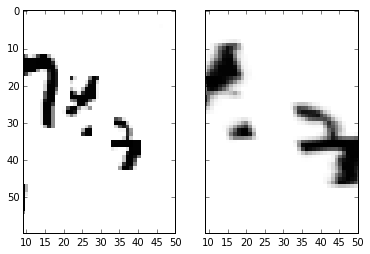

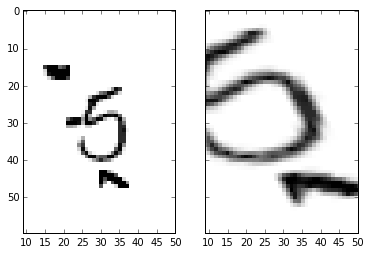

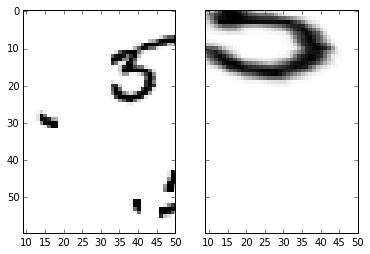

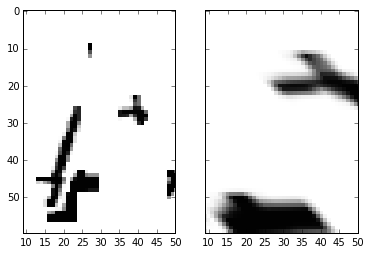

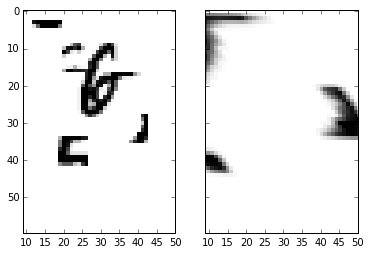

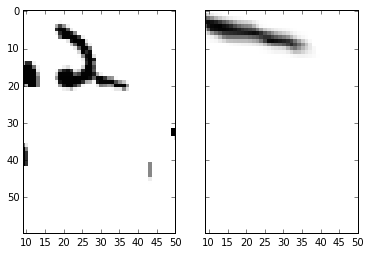

In [16]:
for idx in range(0, 10):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(Xt[idx:idx+1][0][0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
    ax2.imshow(get_trans_out(Xt[idx:idx+1])[0][0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
    #f.savefig("transforms/%i.png" % idx)